\# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Saini Nur Setiawan]
- **Email:** [saininur123@gmail.com]
- **ID Dicoding:** [saini_nur]

## **Menentukan Pertanyaan Bisnis**

- Pertanyaan 1: Produk apa yang paling banyak terjual?
- Pertanyaan 2: Metode pembayaran apa yang paling banyak digunakan konsumen?
- Pertanyaan 3: Bagaimana performa delivery produk dan bagaimana pengaruhnya terhadap review pelanggan?
- Pertanyaan 4: Bagaimana hubungan berat dan volume barang terhadap tarif pengiriman?
- Pertanyaan 5: Bagaimana persebaran seller dan konsumen di tiap daerah (provinsi/state)


## **Import Semua Packages/Library yang Digunakan**

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

## **Data Wrangling**

### **Gathering Data**

In [ ]:
# Upload Dataset
customers_df = pd.read_csv('E_Commerce_Dataset/customers_dataset.csv')
sellers_df = pd.read_csv(r'E_Commerce_Dataset/sellers_dataset.csv')
products_df = pd.read_csv(r'E_Commerce_Dataset/products_dataset.csv')
orders_payment_df = pd.read_csv(r'E_Commerce_Dataset/order_payments_dataset.csv')
orders_items_df = pd.read_csv(r'E_Commerce_Dataset/order_items_dataset.csv')
order_reviews_df = pd.read_csv('E_Commerce_Dataset/order_reviews_dataset.csv')
orders_df = pd.read_csv('E_Commerce_Dataset/orders_dataset.csv')


In [62]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [63]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [64]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [65]:
orders_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [66]:
orders_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [67]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [68]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### **Assessing Data**

In [69]:
def assess_data(df):
    # Info dataset
    print("DataFrame Info:")
    df.info()

    # Describe dataset
    print("\nDataFrame Description:")
    print(df.describe(include='all'))

    # Missing value
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Duplikasi data
    print("\nNumber of Duplicated Rows:")
    print(df.duplicated().sum())

    # Detail dataset
    detail_df = pd.DataFrame({
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].unique() for col in df.columns]
    })

    print("\nFeature Details:")
    return detail_df

In [70]:
assess_data(customers_df) # Customers dataset

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

DataFrame Description:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                              

,feature,data_type,n_unique,sample_unique
0,customer_id,object,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,object,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_zip_code_prefix,int64,14994,"[14409, 9790, 1151, 8775, 13056, 89254, 4534, ..."
3,customer_city,object,4119,"[franca, sao bernardo do campo, sao paulo, mog..."
4,customer_state,object,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M..."


**Insight:**


*   Customers dataset terdiri dari 99441 baris dan 5 kolom
*   Tidak terdapat null values dan duplicate
*   Kolom dengan type **object** sejumlah 4 kolom, dan **int** 1 kolom



In [71]:
assess_data(sellers_df) # Seller dataset

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

DataFrame Description:
                               seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     9e25199f6ef7e7c347120ff175652c3b                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std        

,feature,data_type,n_unique,sample_unique
0,seller_id,object,3095,"[3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb..."
1,seller_zip_code_prefix,int64,2246,"[13023, 13844, 20031, 4195, 12914, 20920, 5532..."
2,seller_city,object,611,"[campinas, mogi guacu, rio de janeiro, sao pau..."
3,seller_state,object,23,"[SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M..."


**Insight:**


*   Sellers dataset terdapat 3095 baris dan 4 kolom
*   Tidak terdapat null values dan duplicate data
*   Kolom dengan tipe data **object** sejumlah 4 kolom, dan **int** sejumlah 1 kolom




In [134]:
assess_data(products_df) # Product dataset

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB

DataFrame Description:
                              product_id product_category_name  \
count                              32340                 32340   
unique                             32340      

,feature,data_type,n_unique,sample_unique
0,product_id,object,32340,"[1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb..."
1,product_category_name,object,73,"[perfumaria, artes, esporte_lazer, bebes, util..."
2,product_name_lenght,float64,66,"[40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57...."
3,product_description_lenght,float64,2960,"[287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127..."
4,product_photos_qty,float64,19,"[1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, 7.0, 12.0,..."
5,product_weight_g,float64,2202,"[225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18..."
6,product_length_cm,float64,99,"[16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40...."
7,product_height_cm,float64,102,"[10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1..."
8,product_width_cm,float64,95,"[14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40...."


**Insight:**


*   Product dataset memiliki 32951 baris dan 9 kolom
*   Tidak terdapat duplicate values
*   Terdapat missing values di beberapa kolom, yaitu:
    - `product_category_name`: 610
    - `product_name_lenght` : 610
    - `product_description_lenght` : 610
    - `product_photos_qty` : 610
    - `product_weight_g` : 2
    - `product_length_cm` : 2
    - `product_height_cm` : 2
    - `product_width_cm` : 2
*   Data dengan tipe **object** sebanyak 2 kolom, **float** 7 kolom.








In [73]:
assess_data(orders_payment_df) # Orders payment dataset

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

DataFrame Description:
                                order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 Na

,feature,data_type,n_unique,sample_unique
0,order_id,object,99440,"[b81ef226f3fe1789b1e8b2acac839d17, a9810da8291..."
1,payment_sequential,int64,29,"[1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1..."
2,payment_type,object,5,"[credit_card, boleto, voucher, debit_card, not..."
3,payment_installments,int64,24,"[8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24..."
4,payment_value,float64,29077,"[99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 8..."


**Insight:**
- orders payment memiliki 103886 baris dan 5 kolom.
- tidak terdapat duplicate dan missing values.
- kolom dengan format `object` sebanyak 2, `int` 2, dan `float` 1.

In [74]:
assess_data(orders_items_df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

DataFrame Description:
                                order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                              

,feature,data_type,n_unique,sample_unique
0,order_id,object,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f..."
1,order_item_id,int64,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,product_id,object,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802..."
3,seller_id,object,3095,"[48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b..."
4,shipping_limit_date,object,93318,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201..."
5,price,float64,5968,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,..."
6,freight_value,float64,6999,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11...."


**Insight:**
- memiliki 112650 baris dan 7 kolom.
- tidak terdapat duplicaate dan missing values.
- memiliki kolom dengan format `object` sebanyak 3, `int` 1, dan `float` 2.

In [75]:
assess_data(order_reviews_df)

DataFrame Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

DataFrame Description:
                               review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     08528f70f579f0c830189efc523d2182  df56136b8031ecd28e200bb18e6ddb2e   
freq                         

,feature,data_type,n_unique,sample_unique
0,review_id,object,98410,"[7bc2406110b926393aa56f80a40eba40, 80e641a11e5..."
1,order_id,object,98673,"[73fc7af87114b39712e6da79b0a377eb, a548910a1c6..."
2,review_score,int64,5,"[4, 5, 1, 3, 2]"
3,review_comment_title,object,4527,"[nan, recomendo, Super recomendo, Não chegou m..."
4,review_comment_message,object,36159,"[nan, Recebi bem antes do prazo estipulado., P..."
5,review_creation_date,object,636,"[2018-01-18 00:00:00, 2018-03-10 00:00:00, 201..."
6,review_answer_timestamp,object,98248,"[2018-01-18 21:46:59, 2018-03-11 03:05:13, 201..."


**Insight:**
- orders_review dataset memiliki 99224 baris dan 7 kolom.
- memiliki missing value di kolom `review_comment_title` dan `review_comment_message` yang cukup banyak.
- tidak terdapat duplikasi data.
- kolom dengan tipe `object` sebanyak 6, dan `int` 1

In [76]:
assess_data(orders_df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

DataFrame Description:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                          

,feature,data_type,n_unique,sample_unique
0,order_id,object,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc..."
1,customer_id,object,99441,"[9ef432eb6251297304e76186b10a928d, b0830fb4747..."
2,order_status,object,8,"[delivered, invoiced, shipped, processing, una..."
3,order_purchase_timestamp,object,98875,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201..."
4,order_approved_at,object,90733,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201..."
5,order_delivered_carrier_date,object,81018,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201..."
6,order_delivered_customer_date,object,95664,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201..."
7,order_estimated_delivery_date,object,459,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201..."


**Insight:**
- orders_dataset memiliki 99441 baris dan 8 kolom.
- terdapat beberapa missing value yaitu pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`
- semua kolom berformat `object`, beberapa seharusnya memiliki format datetime.

### **Cleaning Data**

Membersihkan `Products Dataset`

Text(0.5, 1.0, 'Matrix Plot')

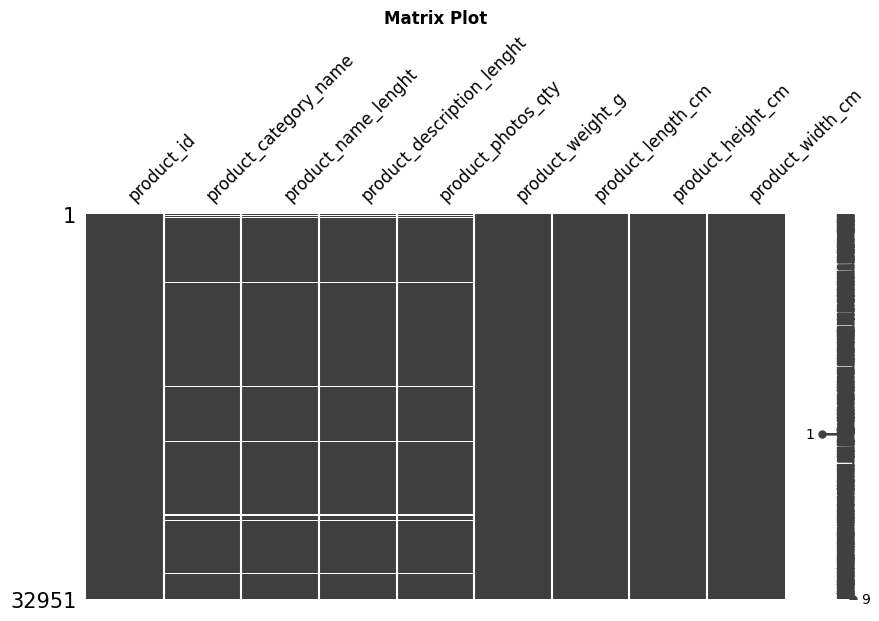

In [77]:
msno.matrix(products_df, figsize=(10,5), fontsize=12).set_title('Matrix Plot', size=12, weight='bold') # Cek missing value

In [78]:
products_df[products_df['product_category_name'].isnull()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [ ]:
products_df = products_df.dropna(thresh=len(products_df.columns) - 3) # menghapus baris dengan minimal 3 missing value

In [80]:
# products_df.info()

Membersihkan `Orders Review Dataset`

Text(0.5, 1.0, 'Matrix Plot')

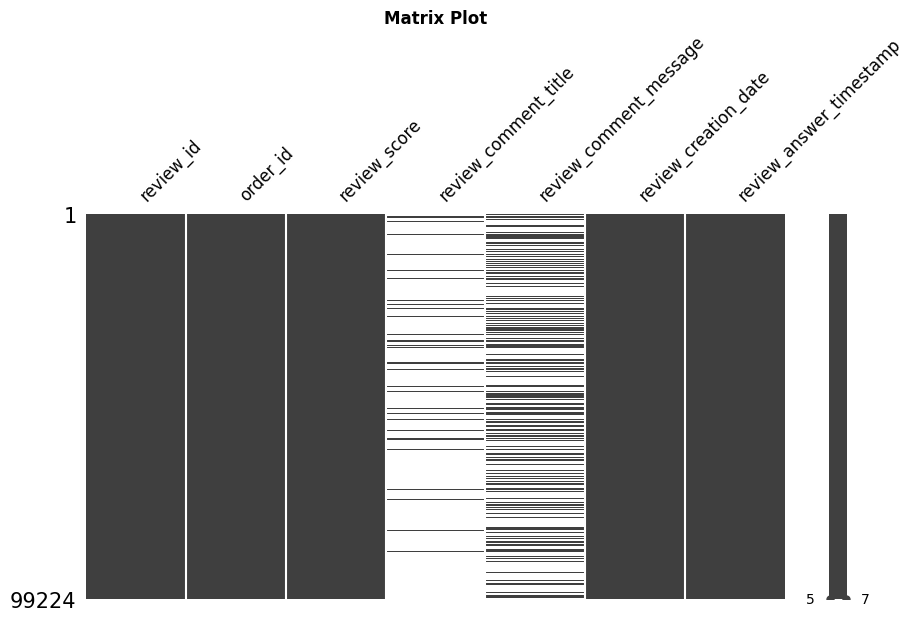

In [81]:
msno.matrix(order_reviews_df, figsize=(10,5), fontsize=12).set_title('Matrix Plot', size=12, weight='bold') # Cek missing value

In [82]:
order_reviews_df = order_reviews_df.dropna(subset=['review_comment_message', 'review_comment_title']) # Drop kolom dengan missing value

In [83]:
# merubah format kolom
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9839 entries, 9 to 99200
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                9839 non-null   object        
 1   order_id                 9839 non-null   object        
 2   review_score             9839 non-null   int64         
 3   review_comment_title     9839 non-null   object        
 4   review_comment_message   9839 non-null   object        
 5   review_creation_date     9839 non-null   datetime64[ns]
 6   review_answer_timestamp  9839 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 614.9+ KB


Membersihkan `Orders Payment Dataset`

In [84]:
not_defined_payments = orders_payment_df[orders_payment_df['payment_type'] == 'not_defined'] # Cek dan drop anomali
not_defined_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [85]:
orders_payment_df = orders_payment_df[orders_payment_df['payment_type'] != 'not_defined']
# orders_payment_df.info()

Membersikan `Orders Dataset`

Text(0.5, 1.0, 'Matrix Plot')

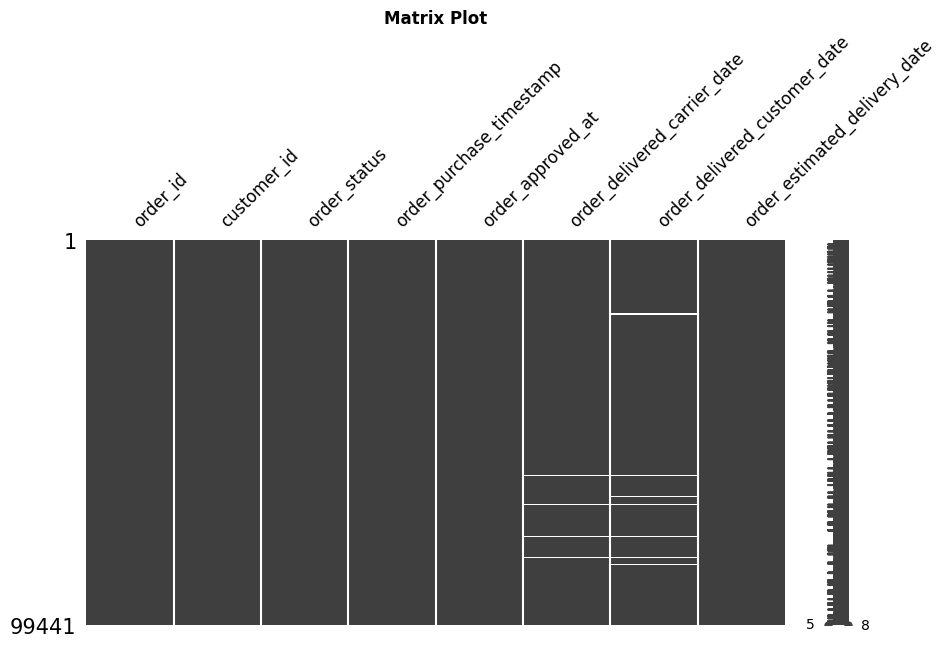

In [86]:
msno.matrix(orders_df, figsize=(10,5), fontsize=12).set_title('Matrix Plot', size=12, weight='bold') # Cek missing value

In [87]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [88]:
orders_df = orders_df.dropna(subset=['order_delivered_customer_date', 'order_approved_at', 'order_delivered_carrier_date'])
# orders_df.info()

In [ ]:
orders_df_date_col = ['order_purchase_timestamp', 'order_approved_at',  # merubah format kolom
                      'order_delivered_carrier_date', 'order_delivered_customer_date',
                      'order_estimated_delivery_date']

for i in orders_df_date_col:
  orders_df[i] = pd.to_datetime(orders_df[i], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# orders_df.info()

Membersihkan `Merged Dataset`

In [90]:
merged_df = pd.merge(orders_df, orders_payment_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, order_reviews_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, orders_items_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')
merged_df = pd.merge(merged_df, sellers_df, on='seller_id', how='left')
merged_df = pd.merge(merged_df, products_df, on='product_id', how='left')


In [91]:
product_name_df = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv') # merubah kolom product_name menjadi bahasa inggris
mapping = dict(zip(product_name_df['product_category_name'], product_name_df['product_category_name_english']))
merged_df['product_category_name'] = merged_df['product_category_name'].replace(mapping)
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,...,maua,SP,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,...,maua,SP,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,...,maua,SP,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,...,belo horizonte,SP,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,...,guariba,SP,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0


Text(0.5, 1.0, 'Matrix Plot')

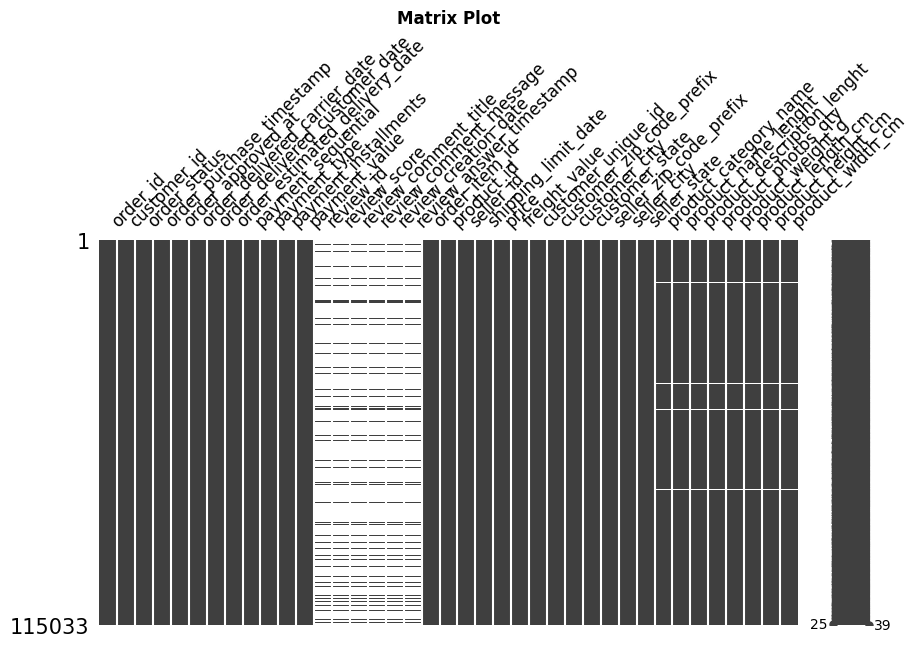

In [92]:
mno.matrix(merged_df, figsize=(10,5), fontsize=12).set_title('Matrix Plot', size=12, weight='bold') # cek missing value

In [93]:
merged_missing_val = ['payment_sequential', 'payment_type', 'payment_installments', 'payment_value',
                      'review_id', 'review_score', 'review_comment_title', 'review_comment_message',
                      'review_creation_date', 'review_answer_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                       'order_delivered_customer_date', 'order_estimated_delivery_date', 'product_category_name', 'product_name_lenght',
                       'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
                       'product_width_cm'
                       ]

merged_df = merged_df.dropna(subset=merged_missing_val)
# merged_df.isnull().sum()

In [94]:
# membuat kolom baru 'Sla-delivery'
merged_df['sla_delivery'] = merged_df['order_estimated_delivery_date'] - merged_df['order_purchase_timestamp']
merged_df['sla_delivery'] = merged_df['sla_delivery'].dt.days

In [95]:
# membuat kolom baru 'delivery_performance'
def categorize_delivery(days):
    if days == 0:
        return 'ontime'
    elif days > 0:
        return 'over_sla'
    else:
        return 'excellent'


merged_df['data'] = merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']
merged_df['data'] = merged_df['data'].dt.days

merged_df['delivery_performance'] = merged_df['data'].apply(categorize_delivery)


In [ ]:
# membuat kolom baru 'volume_product'
merged_df['volume_product'] = merged_df['product_length_cm'] * merged_df['product_height_cm'] * merged_df['product_width_cm']

In [97]:
# merubah inkonsisten data type
merged_df_date_col = ['order_purchase_timestamp', 'order_approved_at',
                      'order_delivered_carrier_date', 'order_delivered_customer_date',
                      'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_creation_date']

for i in merged_df_date_col:
    merged_df[i] = pd.to_datetime(merged_df[i])

In [98]:
# rename kolom 'product_weight_g'
merged_df.rename(columns={'product_weight_g' : 'product_weight'}, inplace=True)

In [99]:
# Drop unused data
merged_df = merged_df.drop(columns=['review_comment_title', 'review_comment_message', 'customer_zip_code_prefix', 'seller_zip_code_prefix',
                                    'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_length_cm',
                                    'product_height_cm', 'product_width_cm', 'data'
                                    ])

In [100]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_category_name,product_weight,sla_delivery,delivery_performance,volume_product
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,...,af07308b275d755c9edb36a90c618231,barreiras,BA,belo horizonte,SP,perfumery,400.0,19,excellent,4693.0
18,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1.0,credit_card,...,ccafc1c3f270410521c3c6f3b249870f,goiania,GO,brasilia,DF,perfumery,150.0,26,excellent,8000.0
29,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1.0,boleto,...,9c9242ad7f1b52d926ea76778e1c0c57,sorocaba,SP,tabatinga,SP,stationery,600.0,7,excellent,10725.0
31,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,1.0,credit_card,...,576ea0cab426cd8a00fad9a9c90a4494,salvador,BA,tabatinga,SP,baby,10950.0,43,excellent,65600.0
32,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,1.0,credit_card,...,576ea0cab426cd8a00fad9a9c90a4494,salvador,BA,ibitinga,SP,baby,350.0,43,excellent,3720.0


**Insight:**
- masih terdapat banyak data dengan missing value pada beberapa kolom. untuk menangani hal tersebut, dilakukan drop pada kolom atau baris yang terdapat missing value.
- sejauh ini tidak terdapat duplikasi data pada beberapa dataset yang ada.
- masih terdapat inkonsisten value atau format yang perlu dilakukan penyesuaian agar sesuai dengan data yang ada. 
- membuat kolom baru dengan beberapa kalkulasi untuk menambah insight dari keseluruhan dataset

## Exploratory Data Analysis (EDA)

In [136]:
from scipy.stats import chi2_contingency

def chi_square_test(df, col1, col2, alpha=0.05):
  'Cek 2 kolom kategorikal'

  contingency_table = pd.crosstab(df[col1], df[col2])
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  if p < alpha:
      result = "Tolak H0: Terdapat korelasi yang signifikan."
  else:
      result = "Gagal menolak H0: Tidak terdapat korelasi yang signifikan."

  return {
      'Chi-Square Statistic': chi2,
      'P-Value': p,
      'Degrees of Freedom': dof,
      'Interpretation': result
      }


### Eksplor `Merged  Dataset`

In [101]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_category_name,product_weight,sla_delivery,delivery_performance,volume_product
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,...,af07308b275d755c9edb36a90c618231,barreiras,BA,belo horizonte,SP,perfumery,400.0,19,excellent,4693.0
18,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1.0,credit_card,...,ccafc1c3f270410521c3c6f3b249870f,goiania,GO,brasilia,DF,perfumery,150.0,26,excellent,8000.0
29,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1.0,boleto,...,9c9242ad7f1b52d926ea76778e1c0c57,sorocaba,SP,tabatinga,SP,stationery,600.0,7,excellent,10725.0
31,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,1.0,credit_card,...,576ea0cab426cd8a00fad9a9c90a4494,salvador,BA,tabatinga,SP,baby,10950.0,43,excellent,65600.0
32,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,1.0,credit_card,...,576ea0cab426cd8a00fad9a9c90a4494,salvador,BA,ibitinga,SP,baby,350.0,43,excellent,3720.0


**Explor Customers Data**

In [102]:
customers_by_state = merged_df.groupby('customer_state').agg({
    'customer_id': 'nunique',
    'sla_delivery': 'mean'
}).sort_values(by='customer_id', ascending=False).head(10)

customers_by_state

,customer_id,sla_delivery
customer_state,,
SP,4115,16.995642
RJ,1182,29.075137
MG,1020,22.909528
RS,412,27.325581
PR,401,22.792490
BA,389,28.054585
SC,282,24.686327
DF,210,21.400000
ES,204,24.286307


In [103]:
top_5_cust = merged_df.groupby('customer_unique_id', as_index=False).agg({
    'order_id': 'nunique',
    'price': 'sum',
}).sort_values(by=['order_id','price'], ascending=False).head(5).reset_index(drop=True)

top_5_cust

,customer_unique_id,order_id,price
0,08e5b38d7948d37fbb2a59fc5e175ab1,3,546.89
1,9c08d6f85c7fcec4b08ead25590c0af7,3,341.89
2,6a9e15d6fa8ce1cabf193c21aa577f64,3,291.70
3,cfa69922f9968e0e6271647abda09b09,3,89.97
4,0341bbd5c969923a0f801b9e2d10a7b8,2,1828.44


**Explore Sellers Data**

In [104]:
sellers_by_state = merged_df.groupby('seller_state', as_index=False).agg({
    'order_id': 'nunique',
    'sla_delivery': 'mean'
}).sort_values(by='order_id', ascending=False).head(10).reset_index(drop=True)

sellers_by_state

,seller_state,order_id,sla_delivery
0,SP,6813,21.487866
1,PR,685,26.100125
2,MG,647,24.014905
3,RJ,477,22.878307
4,SC,310,26.208672
5,RS,177,26.691589
6,MA,139,28.887324
7,PE,69,27.207317
8,DF,66,20.765432
9,BA,56,22.816901


In [105]:
top_5_sellers = merged_df.groupby('seller_id', as_index=False).agg({
    'order_id': 'nunique',
    'price': 'sum',
    'sla_delivery': 'mean'
}).sort_values(by='order_id', ascending=False).head(5).reset_index(drop=True)

top_5_sellers

,seller_id,order_id,price,sla_delivery
0,6560211a19b47992c3666cc44a7e94c0,269,20056.00,19.382166
1,955fee9216a65b617aa5c0531780ce60,174,23514.92,19.597403
2,1025f0e2d44d7041d6cf58b6550e0bfa,155,24148.31,21.598291
3,7d13fca15225358621be4086e1eb0964,147,27412.47,26.772152
4,06a2c3af7b3aee5d69171b0e14f0ee87,139,13314.58,28.887324


**Explore Product Data**

In [106]:
top_product = merged_df.groupby('product_category_name', as_index=False).agg({
    'order_id': 'nunique',
    'price': 'sum',
}).sort_values(by=['order_id'], ascending=False).head().reset_index(drop=True)

top_product

,product_category_name,order_id,price
0,health_beauty,954,144658.38
1,bed_bath_table,922,109841.17
2,watches_gifts,843,179990.73
3,housewares,693,95829.70
4,sports_leisure,629,81542.78


**Explore Payment Data**

In [107]:
most_used_payment = merged_df.groupby('payment_type', as_index=False).agg({
    'order_id': 'nunique',
    'payment_value': 'sum',
    'payment_installments': 'mean'
}).sort_values(by='order_id', ascending=False).reset_index(drop=True)


most_used_payment

,payment_type,order_id,payment_value,payment_installments
0,credit_card,7323,1760212.03,3.750576
1,boleto,1708,444275.64,1.000000
2,voucher,325,36776.27,1.000000
3,debit_card,277,53853.01,1.000000


In [138]:
chi_square_test(merged_df, 'payment_type', 'review_score')

{'Chi-Square Statistic': np.float64(18.50649717424554),
 'P-Value': np.float64(0.10115463167461611),
 'Degrees of Freedom': 12,
 'Interpretation': 'Gagal menolak H0: Tidak terdapat korelasi yang signifikan.'}

**Explore Delivery Data**

In [108]:
delivery_by_state = merged_df.groupby('customer_state', as_index=False).agg({
    'order_id': 'nunique',
    'sla_delivery': 'mean',
    'freight_value': 'mean'
}).sort_values(by='order_id', ascending=False).head(10)

delivery_by_state

,customer_state,order_id,sla_delivery,freight_value
25,SP,4115,16.995642,15.819376
18,RJ,1182,29.075137,23.357889
10,MG,1020,22.909528,22.115917
22,RS,412,27.325581,24.819341
17,PR,401,22.792490,24.086739
4,BA,389,28.054585,29.857271
23,SC,282,24.686327,25.128177
6,DF,210,21.400000,24.265529
7,ES,204,24.286307,24.895145
15,PE,198,28.991416,37.066395


In [109]:
performance_delivery = merged_df.groupby('delivery_performance', as_index=False).agg({
    'order_id': 'nunique',
    'sla_delivery': 'mean',
    'freight_value': 'mean',
    'product_weight': 'mean',
    'volume_product': 'mean'
}).sort_values(by='order_id', ascending=False).reset_index(drop=True)

performance_delivery

,delivery_performance,order_id,sla_delivery,freight_value,product_weight,volume_product
0,excellent,8656,22.861639,21.887762,2075.195316,14422.285340
1,over_sla,630,19.214774,24.477031,2706.474692,17556.626539
2,ontime,157,12.255556,18.276167,2474.972222,15071.422222


In [137]:
chi_square_test(merged_df, 'review_score', 'delivery_performance')

{'Chi-Square Statistic': np.float64(826.081573825437),
 'P-Value': np.float64(4.916444949976401e-173),
 'Degrees of Freedom': 8,
 'Interpretation': 'Tolak H0: Terdapat korelasi yang signifikan.'}

In [139]:
chi_square_test(merged_df, 'payment_type', 'delivery_performance')

{'Chi-Square Statistic': np.float64(39.332902399660284),
 'P-Value': np.float64(6.158660082604448e-07),
 'Degrees of Freedom': 6,
 'Interpretation': 'Tolak H0: Terdapat korelasi yang signifikan.'}

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak terjual?

In [164]:
product_fig = px.bar(top_product, x='product_category_name', y='order_id', title= 'Top product sales')
product_fig.show()

### Pertanyaan 2: Metode pembayaran apa yang paling banyak digunakan konsumen?

In [163]:
payment_fig = px.bar(most_used_payment , x='payment_type', y= 'payment_value', title= 'Most used payment type')
payment_fig.show()

### Pertanyaan 3: Bagaimana performa delivery produk dan bagaimana pengaruhnya terhadap review pelanggan?

In [152]:
ma = pd.crosstab(merged_df['delivery_performance'], merged_df['review_score']).reset_index()
ma_melted = pd.melt(ma, id_vars='delivery_performance', var_name='score', value_name='count')

In [121]:
fig = px.bar(ma_melted, x='delivery_performance', y='count', color='score', title='Delivery Performance vs Review Score')
fig.show()

### Pertanyaan 4: Bagaimana hubungan berat dan volume barang terhadap tarif pengiriman?

In [122]:

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=merged_df['freight_value'], y=merged_df['product_weight'], mode='markers', name='Weight vs Freight'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=merged_df['freight_value'], y=merged_df['volume_product'], mode='markers', name='Volume vs Freight'),
    row=1, col=2
)

# Update layout
fig.update_layout(height=600, width=800, title_text="Freight Value vs Weight and Volume")

fig.show()

### Pertanyaan 5: Bagaimana persebaran seller dan konsumen di tiap daerah (provinsi/state)

In [123]:
seller_consumer = merged_df.groupby('seller_state', as_index=False).agg({
  'seller_id' : 'nunique',
  'customer_unique_id' : 'nunique'
}).sort_values(by='customer_unique_id', ascending=False).head(10).reset_index(drop=True)
seller_consumer

,seller_state,seller_id,customer_unique_id
0,SP,950,6744
1,PR,164,680
2,MG,116,647
3,RJ,82,477
4,SC,79,310
5,RS,48,176
6,MA,1,137
7,PE,4,69
8,DF,18,66
9,BA,9,55


In [124]:
fig_1 = go.Figure(data=[go.Table(
    header=dict(values=list(seller_consumer.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[seller_consumer.seller_state, seller_consumer.seller_id, seller_consumer.customer_unique_id],
               fill_color='lavender',
               align='center')),
])

fig_1.update_layout(width=800)
fig_1. show()

**Insight:**
1. `ealthy_beauty`, `bed_bath_table`, `watches_gift` menjadi kategori produk paling banyak dibeli oleh konsumen.
2. 
3. Pengiriman dengan kategori `excellent` memiliki proporsi paling banyak daripada kategori lainya. Hal ini menunjukan hal yang positif dengan pengiriman yang relatif ccepat. `performance_delivery` dan `review_score` memiliki korelasi yang positif, dimana service `excellent` didominasi oleh review dengan kategori 5 atau memuaskan, sedangkan delivery dengan kategori `over_sla` didominasi oleh review dengan kategori 1 yang menunjukan ketidak puasan konsumen.
4. Biaya kirim memiliki korelasi positif dengan berat dan volume barang. Dalam artian semakin besar atau berat suatu produk, maka biaya kirim akan semakin mahal.
5. SP menjadi state/provinsi dengan jumlah pembeli dan penjual yang paling banyak, disusul dengan PR dan MG pada posisi kedua dan ketiga.

In [ ]:
merged_df.to_csv('merged_df.csv', index=False) # Save final dataset

## Conclusion

- Conclution pertanyaan 1: `ealthy_beauty`, `bed_bath_table`, `watches_gift` menjadi produk dengan jumlah order paling tinggi. Sebaiknya E-commerce dapat berfokus pada produk dengan tingkat penjualan atau konversi yang tinggi dengan strategi pemasaran yang tepat seperti pengaplikasian diskon dan voucher. Produk dengan tingkat konversi rendah sebaiknya dilakukan analisa lebih lanjut mengenai penyebabnya dan dapat dilakukan promosi lebih masif untuk dapat dilihat oleh konsumen.
- Conclution pertanyaan 2: `credit_card` menjadi metode pembayaran favorit konsumen dengan jumlah pembayaran order dan nominal pembayaran paling tinggi. Hal ini masuk akal karena dengan `credit_card` dapat memiliki opsi pembayaran secara kredit yang berdasarkan data memiliki rata-rata tenor 4 bulan. Pembayaran lain perlu ditingkatkan dengan berbagai penawaran menarik untuk meningkatkan kepuasan konsumen dengan berbagai opsi pembayaran.
- Conclution pertanyaan 3: Delivery memiliki hasil yang cukup positif dengan jumlah service `excellent` paling banyak. Namun perlu diperhatikan bahwa `over_sla` menduduki nomor 2 dengan jumlah yang lumayan tinggi. Karena performa delivery memiliki korelasi positif terhadap kepuasan konsumen, maka perlu dilakukan ajjustment terhadap strategi pengiriman produk. Berdasarkan data, dapat dilihat bahwa kategori ini memiliki rata-rata volume dan berat cukup tinggi yang memungkinkan menjadi salah satu faktor buruknya performa delivery, hal ini perlu ditindaklanjuti untuk memecahkan masalah tersebut.
- Conclution pertanyaan 4: Volume dan Berat memiliki korelasi positif terhadap harga.berarti semakin berat atau besar suatu produk, maka ongkos kirim semakin mahal. Hal ini berkaitan dengan poin sebelumnya bahwa dengan mahalnya ongkos kirim, maka diharapkan pelanggan memperoleh pelayanan yang memuaskan.
- Conclution pertanyaan 5: SP menjadi state/provinsi dengan jumlah penjual dan pembeli paling banyak. Ini dapat dilakukan efisiensi dengan pengaplikasian diskon atau voucher terhadap produk-produk yang terjual dalam satu area yang sama untuk meningkatkan retensi pelanggan dan juga meningkatkan keuntungan penjual.